In [ ]:
from IPython.display import Javascript
timeout = 120 # minutes
Javascript("""let timerId = setInterval(() => Jupyter.notebook.execute_cells([1]), 60000);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); },"""+ str(timeout*1000*60)+")")

In [ ]:
A = 2+3

# TP réfraction

Regardez la vidéo d'expérience ci-dessous.

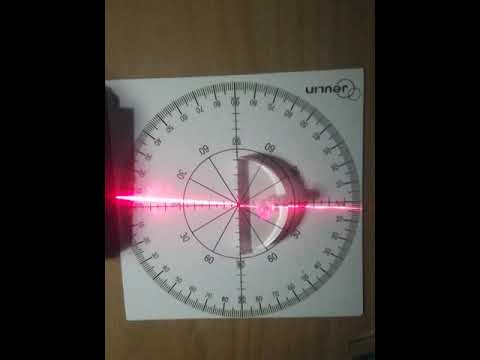

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('2lboRG60DoA', width=500, height=300)

Cette expérience est reproduite dans la simulaton ci-dessous. Attention, dans la vidéo le changement de milieu se fait de gauche à droite alors que dans la simulation elle se fait de haut en bas.

Ce que vous avez à faire:
* Si vous êtes en salle de TP, utilisez le matériel mis à votre disposition afin de réaliser cette expérience, si vous êtes à la maison, utilisez la simulation
* Relevez des valeurs d'angle d'incidence et d'angle de réfraction correspondant sur votre feuille. Il faudra au moins 6 couples de valeurs différentes bien réparties entre 0 et 90°.
* Une fois terminé, cliquez sur "exploiter" afin de modéliser vos données en python
* Suivez les consignes du document de modélisation afin de le rendre à l'enseignant

<IPython.core.display.Javascript object>


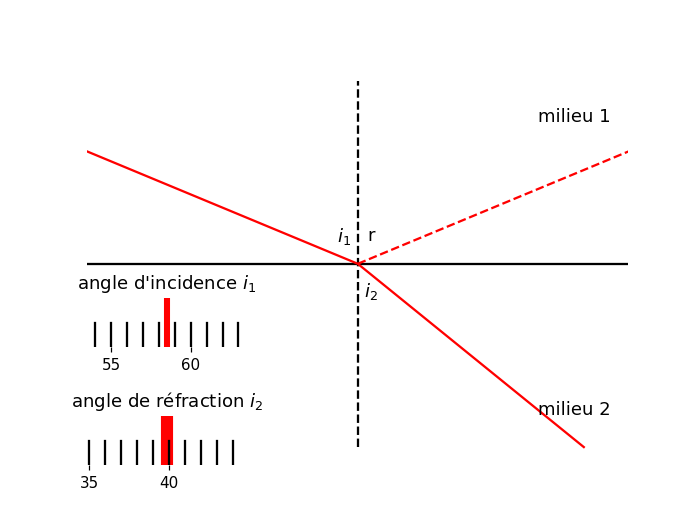

In [2]:
%matplotlib notebook
#En dynamique
from math import cos,pi,sin,atan2,asin,acos
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from ipywidgets.widgets import FloatSlider, Layout, Button, HBox
from IPython.display import display


fig = plt.figure("Simulation d'une expérience de réfraction")

ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(7,3,13)
ax3 = fig.add_subplot(7,3,19)


fig.show() 
    
i1 = FloatSlider(
    value=45.,
    min=0,
    max=90.0,
    step=0.1,
    description='angle i1',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=False,
    readout_format='.1f',
    layout=Layout(width='50%', height='80px')
)
plus = Button(
    description='+',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='+',
    icon='', # (FontAwesome names without the `fa-` prefix)
    layout=Layout(width='80px', height='80px')
)
moins = Button(
    description='-',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='-',
    icon='', # (FontAwesome names without the `fa-` prefix)
    layout=Layout(width='80px', height='80px')
)

n1 = FloatSlider(
    value=1.,
    min=1.,
    max=2.5,
    step=0.01,
    description='indice n1',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=False,
    readout_format='.1f',
)

n2 = FloatSlider(
    value=1.33,
    min=1.,
    max=2.5,
    step=0.01,
    description='indice n2',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=False,
    readout_format='.1f',
)
    
def augmente(b):
    temp = i1.value
    temp += i1.step
    i1.value = temp

def diminue(b):
    temp = i1.value
    temp -= i1.step
    i1.value = temp
    
#@interact(n1=(1.,2.5,0.01),n2=(1.,2.5,0.01),i=(0.,90.,0.1))
def setparam(b = None):
    global A,B,omega,phi,C
    ax1.clear()
    ax2.clear()
    ax3.clear()
    
    ax1.set_xlim([-1,1])
    ax2.set_ylim([0,2])
    ax3.set_ylim([0,2])
    ax1.plot([-1,1],[0,0],"black")
    ax1.plot([0,0],[-1,1],"k--")
    R1=1/cos(i1.value*pi/180)
    x1=-R1*sin(i1.value*pi/180)
    ax2.set_xlim([i1.value-5,i1.value+5])
    try:
        i2 = 180/pi*asin(n1.value/n2.value*sin(i1.value*pi/180))
        ax3.set_xlim([i2-5,i2+5])
        R2=-1/cos(i2*pi/180)
        x2=abs(R2*sin(i2*pi/180))
        
        ax1.plot([x1,0,x2],[1,0,-1],"red")
        ax1.plot([0,-x1],[0,1],"r--")
        #ax1.text(-0.8,-0.8,'i2 = {:.2f} et r = {:.2f}'.format(i2,i1.value),horizontalalignment='center',
    # verticalalignment='center',fontsize=12, color='k')
        ax1.text(0.05,-0.15,r'$i_2$',horizontalalignment='center',
     verticalalignment='center',fontsize=12, color='k')
        rt = False
    except:
        ax1.plot([x1,0,-x1],[1,0,1],"red")
        ax3.set_xlim([0,10])
        rt = True
       # ax1.text(-0.8,-0.8,'Reflexion totale et r = {:.2f}'.format(i1.value),horizontalalignment='center',
     #verticalalignment='center',fontsize=12, color='k')
        
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['left'].set_color('none')
    ax1.spines['bottom'].set_color('none')
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['left'].set_color('none')
    ax2.spines['bottom'].set_color('none')
    #ax2.set_xticks([])
    ax2.set_yticks([])
    
    ax2.plot([i1.value,i1.value],[0,2],"r",linewidth=4)
    for i in range(91):
        ax2.plot([i,i],[0,1],"k")
    ax2.set_title(r"angle d'incidence $i_1$")
    
    
    ax3.spines['right'].set_color('none')
    ax3.spines['top'].set_color('none')
    ax3.spines['left'].set_color('none')
    ax3.spines['bottom'].set_color('none')
    #ax3.set_xticks([])
    ax3.set_yticks([])
    
    if not rt:
        ax3.plot([i2,i2],[0,2],"r",linewidth=8)
    for i in range(91):
        ax3.plot([i,i],[0,1],"k")      
    
    ax3.set_title(r"angle de réfraction $i_2$")
    
    
    ax1.text(-0.05,0.15,r'$i_1$',horizontalalignment='center',
     verticalalignment='center',fontsize=12, color='k')
    ax1.text(0.05,0.15,'r',horizontalalignment='center',
     verticalalignment='center',fontsize=12, color='k')
    ax1.text(0.8,0.8,'milieu 1',horizontalalignment='center',
     verticalalignment='center',fontsize=12, color='k')
    ax1.text(0.8,-0.8,'milieu 2',horizontalalignment='center',
     verticalalignment='center',fontsize=12, color='k')

display(HBox([moins,i1,plus]))
#display(n1,n2)

setparam()

plus.on_click(augmente)
moins.on_click(diminue)
i1.observe(setparam, 'value')  


<a href="../notebooks/exploitation.ipynb" > Exploiter </a>